<a href="https://colab.research.google.com/github/RajeswariSahu/Data-Science-Projects/blob/main/Business_case_for_PRCL_0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Business case for  PRCL-0019
# FicZon Inc Data Science Project

# Business Case

FicZon Inc is an IT solution provider with products ranging from onpremises
products to SAAS based solutions. FicZon major leads
generation channel is digital and through their website.
FicZon business is majorly dependent on the sales force
effectiveness. As the market is maturing and more new competitors
entering the market, FicZon is experiencing the dip in sales.
Effective sales is dependent on lead quality and as of now, this is
based on manual categorization and highly depended on sales staff.
Though there is a quality process, which continuously updates the
lead categorization, it’s value is in for post analysis, rather than
conversation.
FicZon wants to explore Machine Learning to pre-categorize the lead
quality and as result, expecting significant increase in sales
effectiveness.

# Project Goal

1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low
Potential)

In [ ]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import create_engine

In [ ]:
!pip install pandas sqlalchemy mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 31.1 MB/s eta 0:00:00


In [ ]:
# Replace with your database details
database_info = {
    'DB_NAME': 'project_sales',
    'TABLE_NAME': 'data',
    'HOST': '18.136.157.135',
    'PORT': 3306,
    'USERNAME': 'dm_team2',
    'PASSWORD': 'DM!$Team&27@9!20!'
}

In [ ]:
 #Create a database URL
database_url = f"mysql+mysqlconnector://{database_info['USERNAME']}:{database_info['PASSWORD']}@{database_info['HOST']}:{database_info['PORT']}/{database_info['DB_NAME']}"

In [ ]:
# Create a SQLAlchemy engine
engine = create_engine(database_url)

# Replace 'your_table_name' with the actual table name
table_name = database_info['TABLE_NAME']

In [ ]:
!pip install --upgrade sqlalchemy==1.4.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.4.10-cp310-cp310-linux_x86_64.whl size=1509620 sha256=9ce29f2bcba3e81affc2945ad107762a3e88391124535e7d2c4fdffb5e97b5e2
  Stored in directory: /root/.cache/pip/wheels/96/86/8b/ec8c6c6209ca6218491c5ab668c1c2f8efea243d3bcca028da
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.24
    Uninstalling SQLAlchemy-2.0.24:
      Successfully uninstalled SQLAlchemy-2.0.24
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.10 which is incompatible.


In [ ]:
#load the dataset
query = f'SELECT * FROM {table_name};'
data = pd.read_sql(query, engine)

AttributeError: 'OptionEngine' object has no attribute 'execute'

In [ ]:
data

NameError: name 'data' is not defined

# Domain Analysis

What all the columns represents is given below

*  Created : In which date and time the product is created.
*  Product_ID : It represents the product_ID.

*  Source : It represents by using which mode,the company sell its product.
*  Mobile : It is the mobile number of the receiver of the product.

*  EMAIL : It is the e-mail id of the receiver of the product.
*  Sales_Agent : It is the sales agents code.

*  Location : It is the location of the receiver of the product.
*  Delivery_Mode : It shows the delivery mode code.

*  Status : It shows the track of the progress of the product.
 1. Status Junk Lead              
 2. Not Responding         
 3. CONVERTED                
 4. Just Enquiry            
 5. Potential                
 6. Long Term                
 7. In Progress Positive    
 8. In Progress Negative    
 9. LOST                    
 10. Open                     
 11. converted                











# Basic Checks

In [ ]:
data.shape    # check no.of rows and columns

(7422, 9)

In [ ]:
data.columns     # checks name of all columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [ ]:
data.head()    # show first five rows

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [ ]:
data.tail()    # show last five rows

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [ ]:
data.dtypes     # check datatype of all columns

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [ ]:
data.describe()    # shows statistical report

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [ ]:
data.describe(include='O')     # shows statistical report of object datatype

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [ ]:
data.isnull().sum()  # check the missing value

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [ ]:
data.duplicated().sum()    # check duplicate values

2

In [ ]:
# check no.of categories and value counts of categorical columns
x=['Source','Location','Delivery_Mode','Status','Sales_Agent']
for i in x:
  print(i,data[i].unique())
  print('**********************')
  print(i, data[i].value_counts())
  print('-----------------------')

Source ['Website' '' 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Contact' 'Live Chat-Youtube'
 'Live Chat-Justdial']
**********************
Source Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                     

In [ ]:
# drop unwanted variables
data.drop(['Mobile','EMAIL'],axis=1,inplace=True)

In [ ]:
# date and time needs to be set in the proper manner
data['Created']=pd.to_datetime(data['Created'])

In [ ]:
data['Day']=data.Created.dt.day
data['Month']=data.Created.dt.month
data['Weekday']=data.Created.dt.weekday
data['Year']=data.Created.dt.year
data['Hour']=data.Created.dt.hour
data['Minute']=data.Created.dt.minute

In [ ]:
data.head(2)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open,14,11,2,2018,10,5
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,2018,9,22


In [ ]:
data.drop('Created',axis=1,inplace=True)

In [ ]:
data.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,,Website,Sales-Agent-11,,Mode-5,Open,14,11,2,2018,10,5
1,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,2018,9,22


# EDA

## Univariate Analysis

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html('my_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights

What we have analysed from the univariate analysis is given below

*  The percentage of product id-18,15,19 and 9 is more than other product id.
*  34% of the product sold by using call, 25% sold by using Live Chat-Direct, 21% was by using Website.

*  20% of the product have to sell by Sales-Agent-4, 19% have to sell by Sales-Agent-11. 16% have to sell by Sales-Agent-5.
*  Two major locations, where products are sold out are Bangalore and Chennai and the percentage are 28% and 12% respectively.

*  Delivery mode-5 is the highest percentage i.e 40%, Mode-1 is 35% and Mode-3 is 23%.
*  The percentage of junk lead status is highest i.e 21%. Not Responding is 15%.CONVERTED is 11%. Just Enquiry and Potential are 10%.In Progressive Positive is 9%.







## Bivariate Analysis

In [ ]:
cate_col=data[['Product_ID','Sales_Agent','Location','Delivery_Mode','Status']]
cate_col

,Product_ID,Sales_Agent,Location,Delivery_Mode,Status
0,,Sales-Agent-11,,Mode-5,Open
1,,Sales-Agent-10,,Mode-5,Open
2,,Sales-Agent-10,,Mode-5,Open
3,,Sales-Agent-10,,Mode-5,Open
4,,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...
7417,9,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


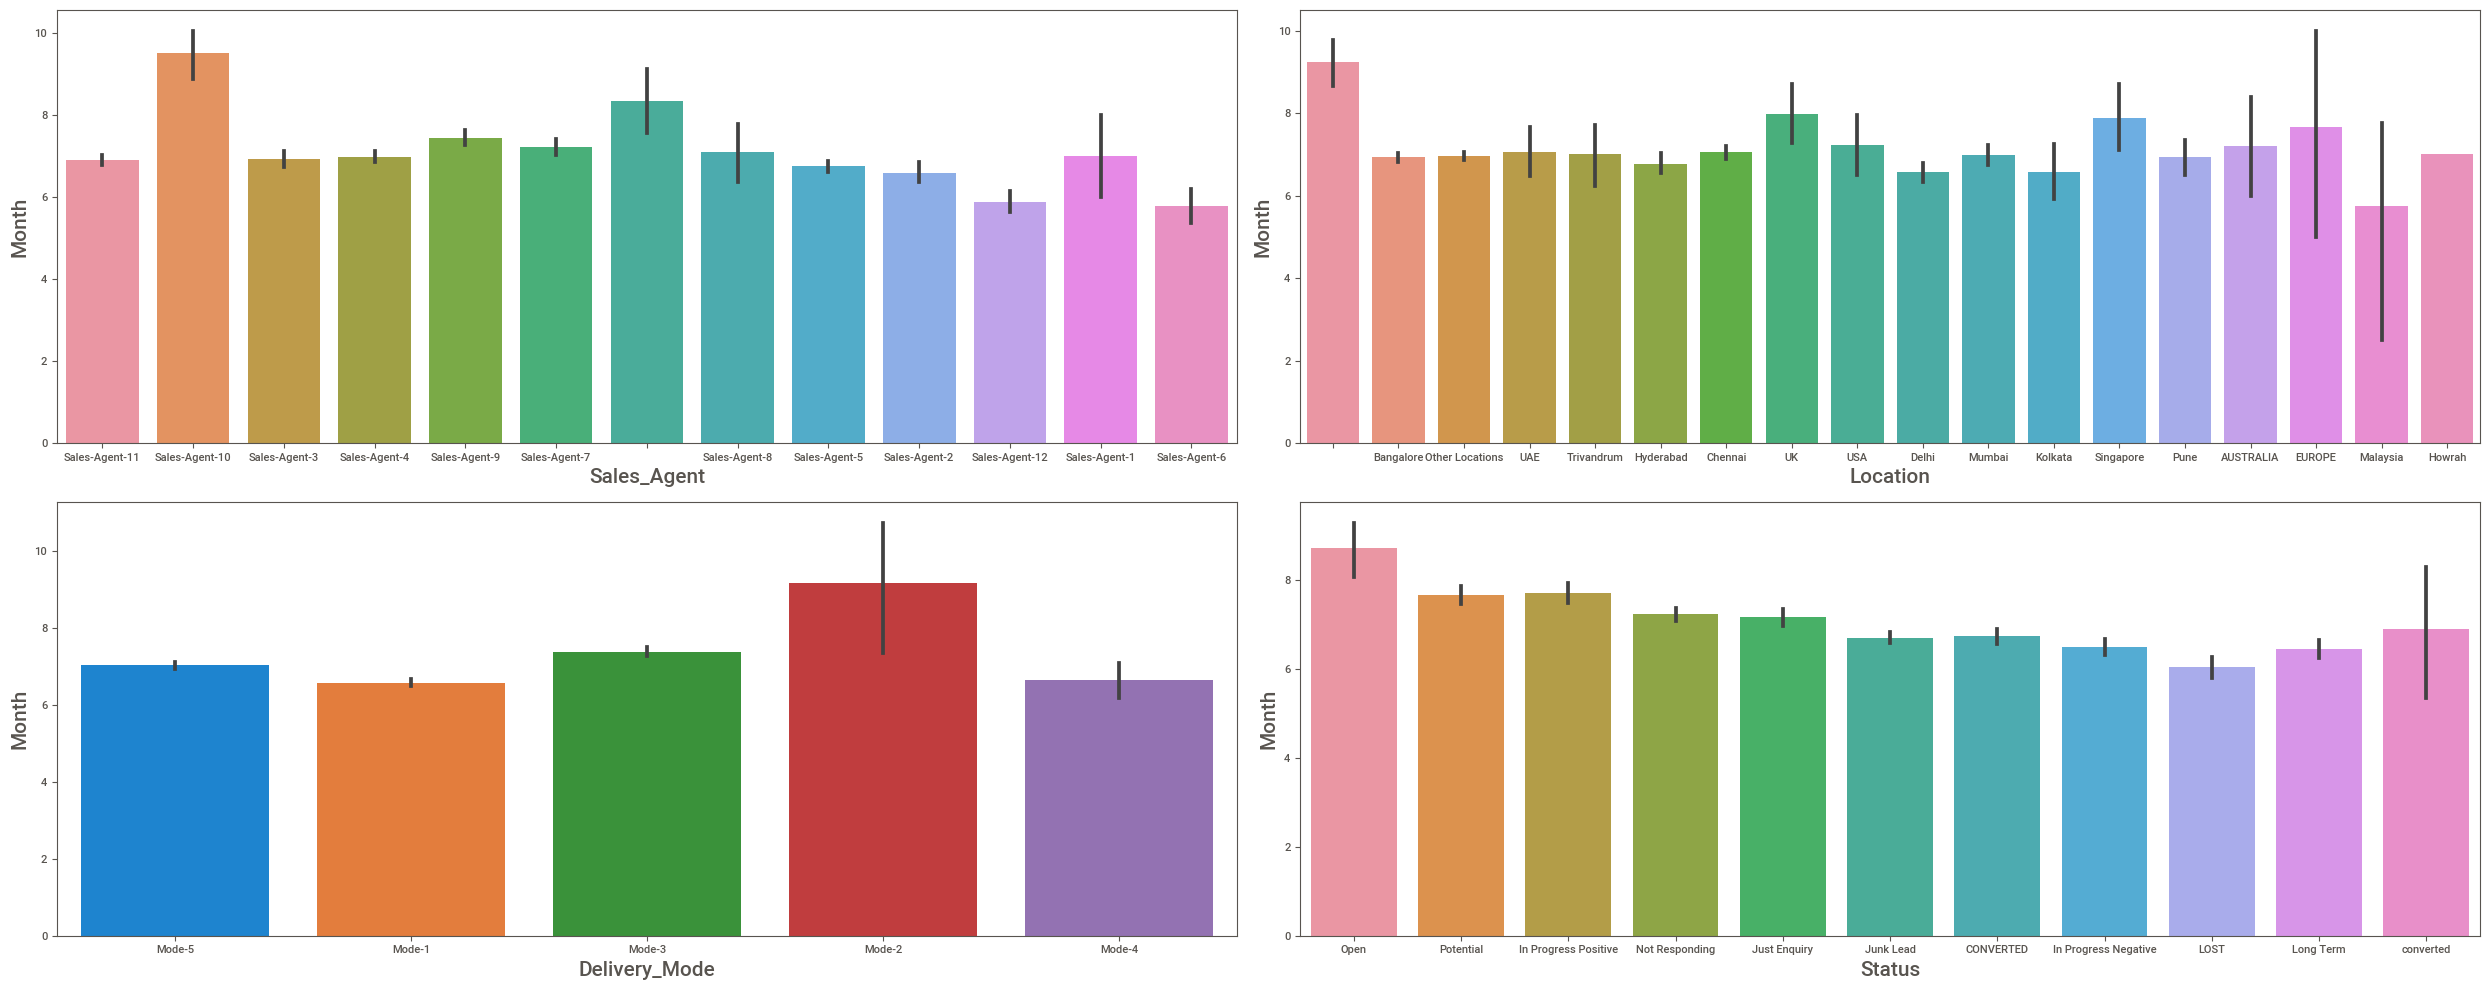

In [ ]:
plt.figure(figsize=(25,10),facecolor='white')
plotnum=1
for column in cate_col.drop('Product_ID',axis=1):
  if plotnum<=4:
    ax=plt.subplot(2,2,plotnum)
    sns.barplot(x=column,y='Month',data=data)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('Month',fontsize=15)
  plotnum+=1
plt.tight_layout()

## Insights

* In the month of September, more no.of products have to sell by Sales Agent-10.
* In the month of August,sales was more in UK and Singapore.

*  In the month of September, more number of products were delivered by Mode-2 and in the month of July , more products were delivered by using Mode-3 and Mode-5.
*  In the month of September, maximum sales status is Open and in July, it was Potential and In Progress Positive.





<Axes: xlabel='Product_ID', ylabel='Month'>

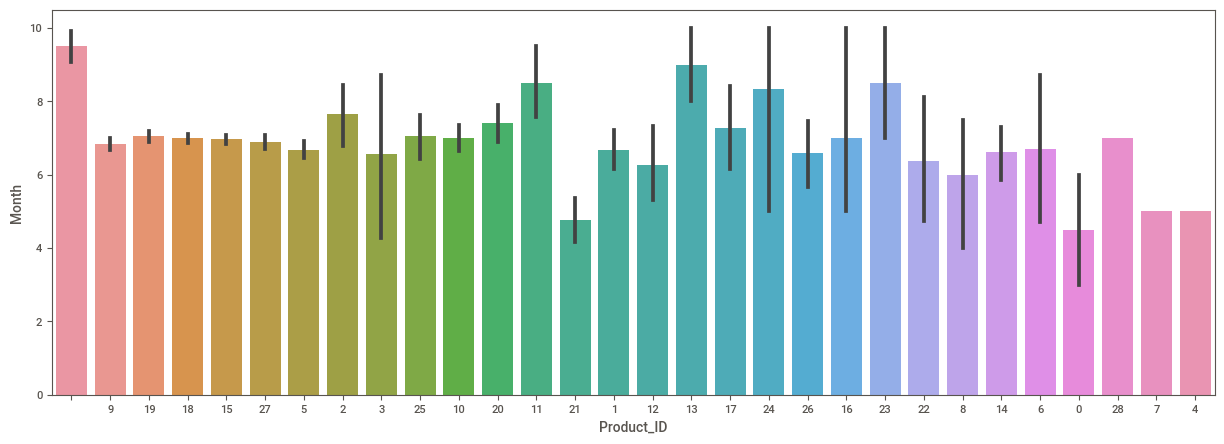

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='Product_ID',y='Month')

## Insight

*  Product_ID 13 have the highest sales in the month of September.



<Axes: xlabel='Source', ylabel='Month'>

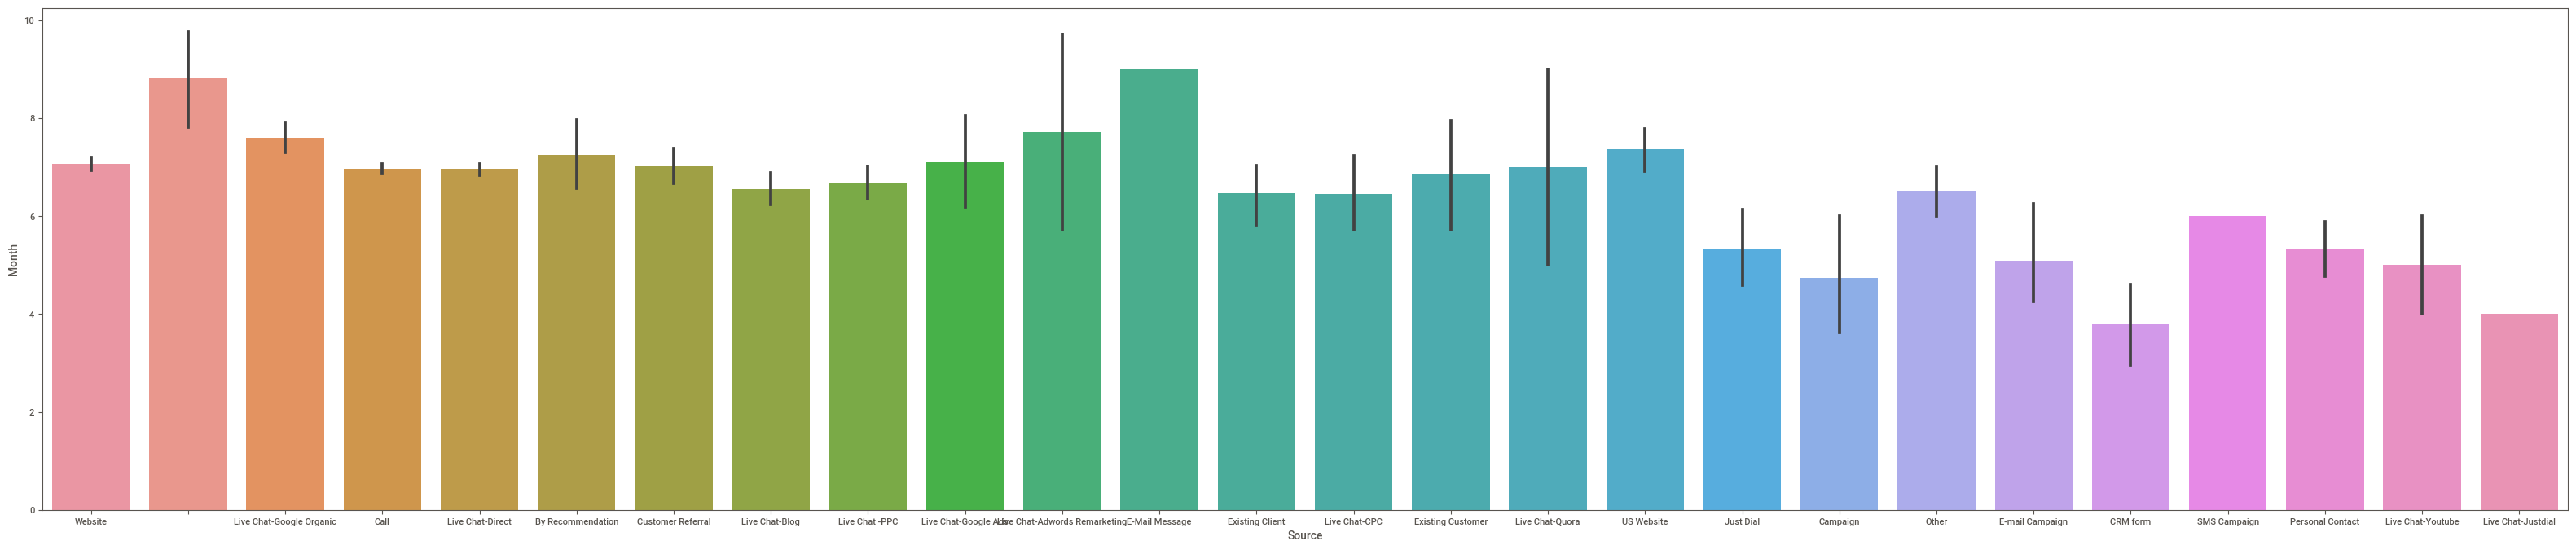

In [ ]:
plt.figure(figsize=(40,8))
sns.barplot(data=data,x='Source',y='Month')

## Insight

*  In September, all sales was made by E-mail Message.In July,call and Live-Chat-Direct is used to sell the product.



## Multivariate Analysis

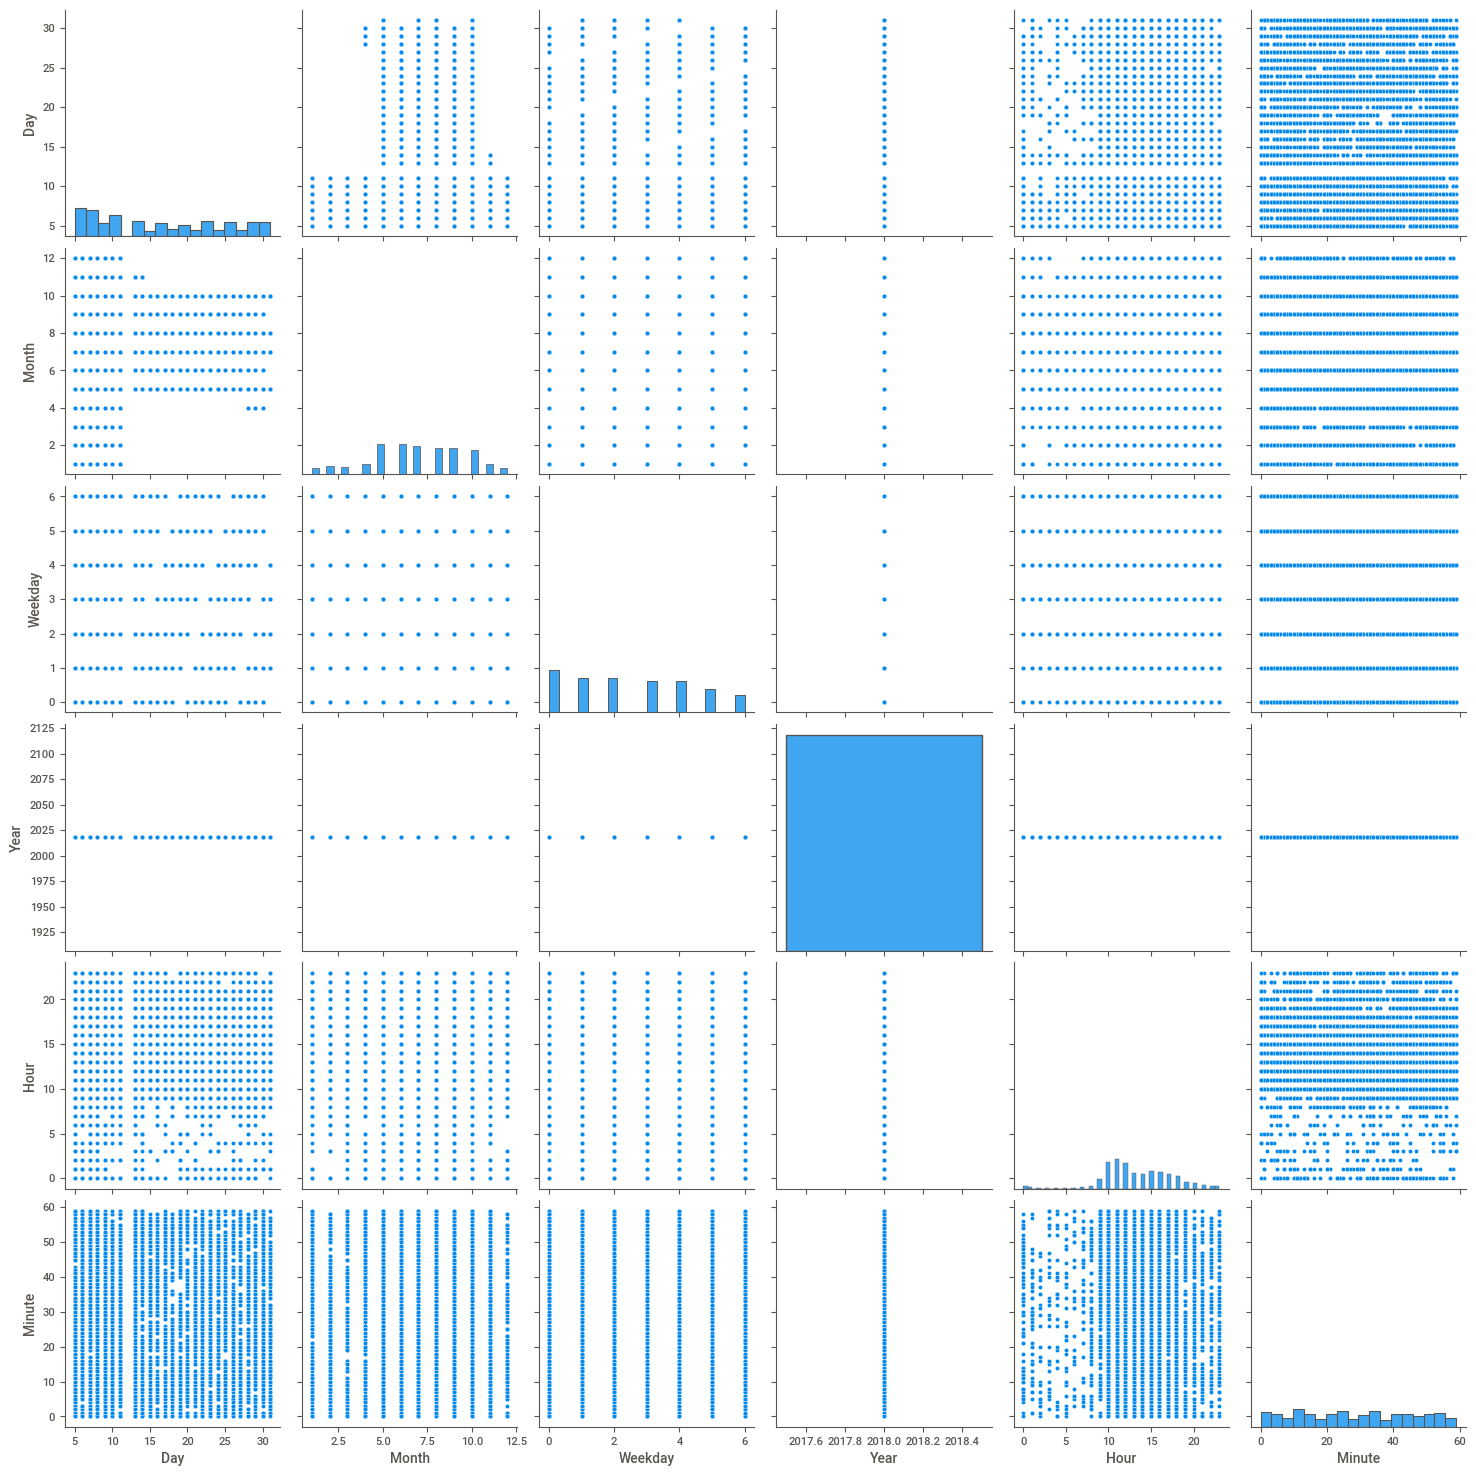

In [ ]:
sns.pairplot(data=data)

# Data Preprocessing

In [ ]:
# check null value
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
Day              0
Month            0
Weekday          0
Year             0
Hour             0
Minute           0
dtype: int64

In [ ]:
# check duplicated value
data.duplicated().sum()

11

In [ ]:
data = data.drop_duplicates(keep='first')

In [ ]:
data.duplicated().sum()   # check no.of duplicate values after dropping

0

In [ ]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,,Website,Sales-Agent-11,,Mode-5,Open,14,11,2,2018,10,5
1,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,2018,9,22
2,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,2018,9,21
3,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,2018,8,46
4,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,2018,7,34


In [ ]:
# dataset have some empty rows i.e 1-2%. We should delete those rows

data.drop(data[data['Product_ID']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Source']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Sales_Agent']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Location']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Delivery_Mode']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Status']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Day']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Month']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Year']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Hour']==''].index,inplace=True)

In [ ]:
data.drop(data[data['Minute']==''].index,inplace=True)

In [ ]:
data1=data.copy()
data1

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
18,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential,13,11,1,2018,18,51
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential,13,11,1,2018,18,48
24,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential,13,11,1,2018,17,9
25,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,13,11,1,2018,16,49
26,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,13,11,1,2018,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST,28,4,5,2018,9,45
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST,28,4,5,2018,9,43
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28,4,5,2018,9,20
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28,4,5,2018,8,4


In [ ]:
data1['Source'].value_counts()

Call                             2528
Live Chat-Direct                 1827
Website                          1551
Live Chat-Google Organic          269
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 179
US Website                        129
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      49
By Recommendation                  32
Existing Customer                  22
CRM form                           22
Live Chat-Google Ads               20
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [ ]:
# converting categorical data to numerical data
data1.Source=data1.Source.map({'Live Chat-Justdial':0,'E-Mail Message':1,'Live Chat-Youtube':2,'SMS Campaign':3,'Other':4,'Live Chat-Quora':5,'Live Chat-Adwords Remarketing':6,'E-mail Campaign':7,'Campaign':8,'Live Chat-Google Ads':9,'Existing Customer':11,'CRM form':10,'By Recommendation':12,'Live Chat-CPC':13,'Personal Contact':14,'Existing Client':15,'Just Dial':16,'US Website':17,'Customer Referral':18,'Live Chat-Blog':19,'Live Chat -PPC':20,'Live Chat-Google Organic':21,'Website':22,'Live Chat-Direct':23,'Call':24})

In [ ]:
data1['Sales_Agent'].value_counts()

Sales-Agent-4     1490
Sales-Agent-11    1412
Sales-Agent-5     1181
Sales-Agent-9      878
Sales-Agent-3      779
Sales-Agent-7      734
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10       5
Name: Sales_Agent, dtype: int64

In [ ]:
# converting categorical data to numerical data
data1.Sales_Agent=data1.Sales_Agent.map({'Sales-Agent-10':0,'Sales-Agent-8':1,'Sales-Agent-6':2,'Sales-Agent-12':3,'Sales-Agent-2':4,'Sales-Agent-7':5,'Sales-Agent-3':6,'Sales-Agent-9':7,'Sales-Agent-5':8,'Sales-Agent-11':9,'Sales-Agent-4':10})

In [ ]:
data1['Location'].value_counts()

Other Locations    2473
Bangalore          2078
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Pune                139
UAE                  77
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [ ]:
# converting categorical data to numerical data
data1.Location=data1.Location.map({'Howrah':0,'EUROPE':1,'Malaysia':2,'Singapore':3,'AUSTRALIA':4,'UK':5,'USA':6,'Kolkata':7,'Trivandrum':8,'UAE':9,'Pune':10,'Mumbai':11,'Delhi':12,'Hyderabad':13,'Chennai':14,'Bangalore':15,'Other Locations':16})

In [ ]:
data1['Delivery_Mode'].value_counts()

Mode-5    2894
Mode-1    2614
Mode-3    1681
Mode-4     120
Mode-2      10
Name: Delivery_Mode, dtype: int64

In [ ]:
# converting categorical data to numerical data
data1.Delivery_Mode=data1.Delivery_Mode.map({'Mode-2':0,'Mode-4':1,'Mode-3':2,'Mode-1':3,'Mode-5':4})

In [ ]:
data1['Status'].value_counts()

Junk Lead               1525
Not Responding          1118
CONVERTED                833
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [ ]:
# converting categorical data to numerical data
data1.Status=data1.Status.map({'converted':1,'Open':1,'LOST':0,'In Progress Negative':0,'In Progress Positive':1,'Long Term':1,'Potential':1,'Just Enquiry':1,'CONVERTED':1,'Not Responding':0,'Junk Lead':0})

In [ ]:
data1.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
18,9,21,6,15,3,1,13,11,1,2018,18,51
19,19,24,10,16,4,1,13,11,1,2018,18,48
24,18,22,9,8,3,1,13,11,1,2018,17,9
25,15,22,5,13,3,0,13,11,1,2018,16,49
26,18,24,5,15,3,1,13,11,1,2018,16,37


# Feature Selection

In [ ]:
# droping unwanted variable
data1.drop('Weekday',axis=1,inplace=True)

In [ ]:
data1.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Year,Hour,Minute
18,9,21,6,15,3,1,13,11,2018,18,51
19,19,24,10,16,4,1,13,11,2018,18,48


In [ ]:
# change the index position of Status column
column_to_shift = 'Status'
new_position = 10

In [ ]:
location_column = data1.pop(column_to_shift)

In [ ]:
# Insert the column at the new position
data1.insert(new_position, column_to_shift, location_column)

In [ ]:
data1.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Day,Month,Year,Hour,Minute,Status
18,9,21,6,15,3,13,11,2018,18,51,1
19,19,24,10,16,4,13,11,2018,18,48,1
24,18,22,9,8,3,13,11,2018,17,9,1
25,15,22,5,13,3,13,11,2018,16,49,0
26,18,24,5,15,3,13,11,2018,16,37,1


# Model Creation

## Logistic Regression

In [ ]:
# split data into x and y
x=data1.drop('Status',axis=1)
y=data1.Status

In [ ]:
## Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [ ]:
x_train.shape

(5123, 10)

In [ ]:
x_test.shape

(2196, 10)

In [ ]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [ ]:
# initialize the model
model_1=LogisticRegression()

In [ ]:
# train model with x_train,y_train
model_1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# make prediction using x_test
y_pred=model_1.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[670, 429],
       [517, 580]])

In [ ]:
accuracy_score(y_test,y_pred)

0.569216757741348

In [ ]:
precision_score(y_test,y_pred)

0.574826560951437

In [ ]:
recall_score(y_test,y_pred)

0.528714676390155

In [ ]:
f1_score(y_test,y_pred)

0.5508072174738842

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.61      0.59      1099
           1       0.57      0.53      0.55      1097

    accuracy                           0.57      2196
   macro avg       0.57      0.57      0.57      2196
weighted avg       0.57      0.57      0.57      2196



In [ ]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score) # since roc_auc score is near to 1,we say its good model

0.5691799041641402


In [ ]:
# do the prediction by putting values of each column
model_1.predict([[15,22,5,16,4,22,4,2018,8,55]])

array([0])

After entering value for each column, the logistic regression model is predicted that there is low potential.

# SVM

In [ ]:
# split data into x and y
x=data1.drop('Status',axis=1)
y=data1.Status

In [ ]:
## Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
# Balancing the data

data1.Status.value_counts()

0    3707
1    3612
Name: Status, dtype: int64

In [ ]:
!pip install imblearn

In [ ]:
## Data is imbalanced and will balance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [ ]:
#smote is always applied on train data(x_train and y_train)
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [ ]:
# Counter is a container which keeps track to how many times equivalent values are added.
#Python counter collections module and is a subclass of dictionary

from collections import Counter
print('Actual classes',Counter(y_train))
print('SMOTE classes',Counter(y_smote))

Actual classes Counter({0: 2607, 1: 2516})
SMOTE classes Counter({1: 2607, 0: 2607})


In [ ]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier=SVC()
svclassifier.fit(x_smote,y_smote)

SVC()

In [ ]:
y_pred=svclassifier.predict(x_test)

In [ ]:
# Evaluating the model created

from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.5182149362477231

In [ ]:
f1_score(y_test,y_pred)

0.5371828521434822

In [ ]:
# Classification report measures the quality of predictions.True Positive,False Positive,True Negative,False Negative
# are used to predict the metrics of a classification report.

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50      1100
           1       0.52      0.56      0.54      1096

    accuracy                           0.52      2196
   macro avg       0.52      0.52      0.52      2196
weighted avg       0.52      0.52      0.52      2196



In [ ]:
# Checking cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
scores

array([0., 0., 0.])

In [ ]:
print('cross validation score',scores.mean())

cross validation score 0.0


In [ ]:
print('Standard deviation',scores.std())

#std<0.05,then model is good otherwise bad model

Standard deviation 0.0


In [ ]:
# Hyper parameter Tuning
##gridsearch CV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define hyper parameter range
param_grid={'C':[0.1,5,10,25,45,60,70],'gamma':[1,0.1,0.01,0.001,0.001],'random_state':list(range(1,20))}
model_2=SVC()
grid=GridSearchCV(model_2,param_grid,verbose=1,scoring='f1',cv=3)
grid.fit(x,y)

Fitting 3 folds for each of 665 candidates, totalling 1995 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 25, 45, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=1)

In [ ]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 0.01, 'random_state': 1}


In [ ]:
model_2=SVC(C=0.1,gamma=0.01,random_state=1)

In [ ]:
model_2.fit(x_smote,y_smote)

SVC(C=0.1, gamma=0.01, random_state=1)

In [ ]:
y_pred=model_2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5878870673952641

In [ ]:
f1_score(y_test,y_pred)

0.6390107698444356

In [ ]:
# do the prediction by putting values of each column
grid.predict([[15,22,5,16,4,22,4,2018,8,55]])

array([0])

After entering value for each column, the SVM model is predicted that there is low potential.

## Decision Tree

In [ ]:
# split data into x and y
x=data1.drop('Status',axis=1)
y=data1.Status

In [ ]:
## Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
# Balacing the data using SMOTE
from imblearn.over_sampling import SMOTE #for balancing the data

sm = SMOTE()

x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [ ]:
# count of each label
from collections import Counter# importing counter to check count of each label

In [ ]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({0: 2607, 1: 2516})
after smote Counter({1: 2607, 0: 2607})


In [ ]:
# Import the algorithm and train the model
from sklearn.tree import DecisionTreeClassifier

model_3=DecisionTreeClassifier()

model_3.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [ ]:
# Predictions -- x_test (unknown or new records to the model)
y_pred=model_3.predict(x_test)

In [ ]:
# Predictions with x train (the known records)
y_train_predict=model_3.predict(x_train)   #predicting training data to check training performance

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [ ]:
# training accuracy
accuracy_score(y_train,y_train_predict)

0.999609603747804

In [ ]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.5910746812386156

Here , it is 59%

meaning our training score is high , but out testing score is low -> situation is called as overfitting

Our next task is to overcome this overfitting.So we apply hyperparameter tuning.

## Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [ ]:
# Applying the Grid Search CV

dtc = DecisionTreeClassifier(random_state=3)
grid_2= GridSearchCV(dtc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
grid_2.fit(x_smote,y_smote)
best_params = grid_2.best_params_
print(grid_2.best_params_)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
grid_2.best_score_

0.6540084388185654

In [ ]:
model_3=DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=10,
                             min_samples_split=2, splitter='best')
model_3.fit(x_smote,y_smote) #training the model
y_pred=model_3.predict(x_test) #prediction
y_pred #predicted values


array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
y_train_predict=model_3.predict(x_smote)#predicting training data to check training performance
y_train_predict

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Training score
accuracy_score(y_smote,y_train_predict)

0.6917913310318373

In [ ]:
# Testing accuracy
accuracy_score(y_test,y_pred)

0.6288706739526412

After applying hyperparameter tuning, the testing score is better than training score as compared to the previous score.

In [ ]:
# do the prediction by putting values of each column
grid_2.predict([[15,22,5,16,4,22,4,2018,8,55]])

array([0])

After entering value for each column, the decision tree model is predicted that there is low potential.

# Random Forest

In [ ]:
# split data into x and y
x=data1.drop('Status',axis=1)
y=data1.Status

In [ ]:
## Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_4=RandomForestClassifier()
model_4.fit(x_smote,y_smote)
y_pred=model_4.predict(x_test)

In [ ]:
#TRAINING ACCURACY
y_pred_train = model_4.predict(x_train)

In [ ]:
accuracy_score(y_train,y_pred_train)

0.999609603747804

In [ ]:
# Testing accuracy
accuracy_score(y_test,y_pred)

0.6552823315118397

Here , it is 65%

meaning our training score is high i.e nearly 100% , but our testing score is low -> situation is called as overfitting.

Our next task is to overcome this overfitting.So we will apply hyperparameter tuning.

## Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=1400, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
# dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)    # model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 866, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators=866, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=10, bootstrap=False) # passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)

In [ ]:
y_train_pred=rf_clf2.predict(x_train)

In [ ]:
# training accuracy
accuracy_score(y_train,y_train_pred)

0.8664844817489752

In [ ]:
# testing accuracy
accuracy_score(y_test,y_predict)

0.6657559198542805

In [ ]:
# do the prediction by putting values of each column
rf_cv.predict([[15,22,5,16,4,22,4,2018,8,55]])

array([0])

After entering value for each column, the Random Forest model is predicted that there is low potential.

## Bagging

In [ ]:
# split data into x and y
x=data1.drop('Status',axis=1)
y=data1.Status

In [ ]:
## Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(base_estimator=model_1,n_estimators=200)
model_bag.fit(x_smote,y_smote)
y_pred=model_bag.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5801457194899818

In [ ]:
# do the prediction by putting values of each column
model_bag.predict([[15,22,5,16,4,22,4,2018,8,55]])

array([0])

After entering value for each column, the Bagging model is predicted that there is low potential.

# KNN

In [ ]:
# split data into x and y
x=data1.drop('Status',axis=1)
y=data1.Status

In [ ]:
## Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5519125683060109

In [ ]:
# how to select k value
error_rate=[]
for k in range(1,11):
  KNN=KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_smote,y_smote)
  y_pred=KNN.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))

In [ ]:
error_rate

[0.4266848816029144,
 0.44808743169398907,
 0.4203096539162113,
 0.43579234972677594,
 0.40437158469945356,
 0.41939890710382516,
 0.4116575591985428,
 0.4225865209471767,
 0.40619307832422585,
 0.41939890710382516]

Text(0.5, 1.0, 'k v/s error')

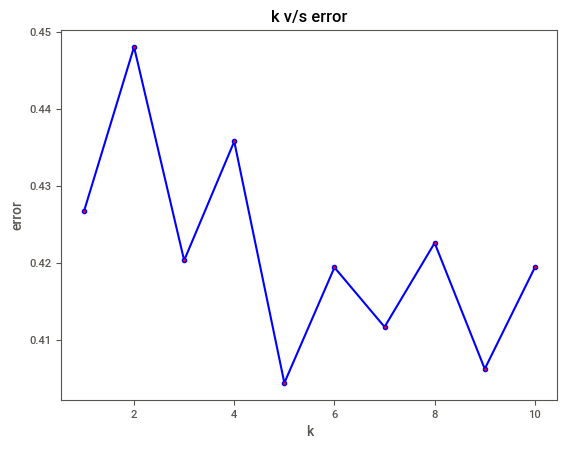

In [ ]:
plt.plot(range(1,11),error_rate,color='blue',marker="o",markerfacecolor='red')
plt.xlabel("k")
plt.ylabel("error")
plt.title("k v/s error")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5956284153005464

In [ ]:
# do the prediction by putting values of each column
KNN.predict([[15,22,5,16,4,22,4,2018,8,55]])

array([0])

After entering value for each column, the KNN model is predicted that there is low potential.

# Boosting

In [ ]:
# split data into x and y
x=data1.drop('Status',axis=1)
y=data1.Status

In [ ]:
## Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=100)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [ ]:
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=GB.predict(x_test)

In [ ]:
y_train_pred=GB.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred)

0.6753187613843351

In [ ]:
accuracy_score(y_train,y_train_pred)

0.7245754440757368

In [ ]:
f1_score(y_test,y_pred)

0.6887821911828896

In [ ]:
# do the prediction by putting values of each column
GB.predict([[15,22,5,16,4,22,4,2018,8,55]])

array([0])

After entering value for each column, the Boosting model is predicted that there is low potential.

# XG BOOST

In [ ]:
data1['Product_ID'] = data1['Product_ID'].astype(int)

In [ ]:
# split data into x and y
x=data1.drop('Status',axis=1)
y=data1.Status

In [ ]:
## Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model_5=XGBClassifier()
model_5.fit(x_train,y_train)
accuracy_score(y_test,y_pred)

0.6753187613843351

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid={'gamma':[0.01,0.2,0.4,0.8,0.1,2,101.2,42.5],
           'learning_rate':[0.01,0.02,0.04,0.18,0.28],
           'max_depth':[4,8,5,6,9,12,15,20,22,24],
           'n_estimators':[25,56,45,89,125,250,450,280],
           'reg_alpha':[0,0.1,0.4,0.2,0.6,0.8,12.5,8.5],
           'reg_lambda':[0,0.1,0.2,0.4,0.8,1.8,6.5,8.25,4.8]}

In [ ]:
XGB=XGBClassifier(random_state=42,verbosity=0)

In [ ]:
rcv=RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
rcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0.01, 0.2, 0.4, 0.8, 0.1, 2,
                                                  101.2, 42.5],
                                        'learning_rate': [0.01, 0.02, 0.04,
                                                          0.18, 0.28],
                                        'max_depth': [4, 8, 5, 6, 9, 12, 15, 20,
                                                      22, 24],
                                        'n_estimators': [25, 56, 45, 89, 125,
                                                         250, 450, 280],
                                        'reg_alpha': [0, 0.1, 0.4, 0.2, 0.6,
                                                      0.8, 12.5, 8.5],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.8, 6.5, 8.25, 4.8]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
cv_best_params=rcv.best_params_
print(f'best parameters:{cv_best_params}')

best parameters:{'reg_lambda': 4.8, 'reg_alpha': 0.6, 'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.28, 'gamma': 42.5}


In [ ]:
XGB_model=XGBClassifier(reg_lambda=4.8, reg_alpha=0.6, n_estimators=250, max_depth=9, learning_rate=0.28, gamma=42.5)
XGB_model.fit(x_train,y_train)
y_predict=XGB_model.predict(x_test)

In [ ]:
y_train_pred=XGB_model.predict(x_train)

In [ ]:
accuracy_score(y_test,y_predict)

0.6357012750455373

In [ ]:
# do the prediction by putting values of each column
rcv.predict([[15,22,5,16,4,22,4,2018,8,55]])

array([0])

# Model Comparision
1. Logistic Regression

* accuracy_score-0.5692 i.e 57%

2. SVM

* accuracy_score-0.5182 i.e 52%

 After hyperparameter tuning

* accuracy_score-0.5878 i.e 58%

3. Decision Tree

* Training accuracy score-0.9996 i.e 100%

* Testing accuracy score-0.5910 i.e 59%

 After hyperparameter tuning

*  Training accuracy score-0.6917 i.e 69%

*  Testing accuracy score-0.6288 i.e 63%

4. Random Forest

*  Training accuracy score-0.9996 i.e 100%

*  Testing accuracy score-0.6552 i.e 65%

 After hyperparameter tuning

* Training accuracy score-0.8664 i.e 86%

* Testing accuracy score-0.6657 i.e 66%

5. Bagging

* accuracy_score-0.5801 i.e 58%

6. KNN

* accuracy_score-0.5956 i.e 59%

7. Boosting

* Testing accuracy_score-0.6753 i.e 67%

*  Training accuracy_score-0.7245 i.e 72%

8. XGBoost

* accuracy_score-0.6753 i.e 67%

 After hyperparameter tuning

* accuracy_score-0.6357 i.e 63%

After analysing all the model,we conclude that Boosting is the best model.


